## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
number_mice = merge_df["Mouse ID"].value_counts().count()
number_mice

249

In [7]:
merge_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dup_mice = merge_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)
dup_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merge_df[dup_mice]
dup_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(dup_mice_df.index)
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_df["Mouse ID"].value_counts().count()
clean_number_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [20]:

summary_table =merge_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

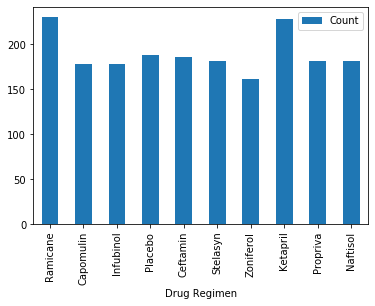

In [23]:
regimen_plot = merge_df[['Drug Regimen']].drop_duplicates()
regimen_plot['Count'] = merge_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)'].values
regimen_plot
regimen_plot.plot.bar('Drug Regimen','Count')

plt.show()

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

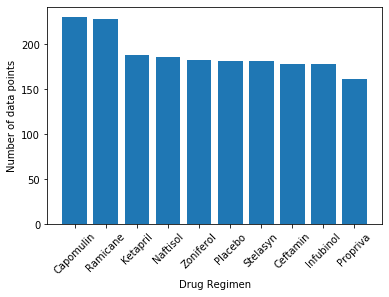

In [19]:
counts = merge_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of data points")
plt.show()

## Pie Plots

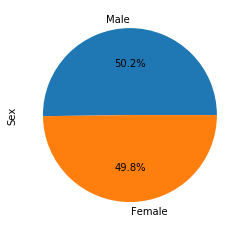

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_sex = merge_df[["Mouse ID", "Sex"]]
pandas_sex = pandas_sex.drop_duplicates(subset ="Mouse ID", keep = "first")
pandas_sex = pandas_sex["Sex"].value_counts()
pandas_sex.plot.pie(autopct = '%1.1f%%')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

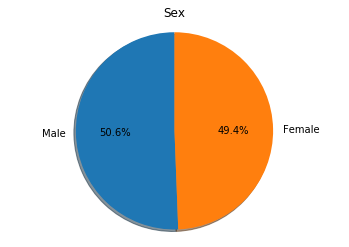

In [22]:
plt.title("Sex")
plt.pie(merge_df["Sex"].value_counts(), autopct="%1.1f%%", shadow=True, startangle=90, labels=["Male","Female"])
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mice = merge_df.groupby(['Drug Regimen','Mouse ID']).last()
mice.reset_index(level=0, inplace = True)
mice

Capomulin=mice[mice['Drug Regimen']=="Capomulin"]
Capomulin
cap_tumor = Capomulin['Tumor Volume (mm3)']
cap_tumor

Ramicane=mice[mice['Drug Regimen'] == "Ramicane"]
ram_tumor = Ramicane['Tumor Volume (mm3)']
ram_tumor

Infubinol=mice[mice['Drug Regimen'] == "Infubinol"]
inf_tumor = Infubinol['Tumor Volume (mm3)']
inf_tumor

Ceftamin=mice[mice['Drug Regimen'] == "Ceftamin"]
cef_tumor = Ceftamin['Tumor Volume (mm3)']
cef_tumor

# If the data is in a dataframe, we use pandas to give quartile calculations

tumor_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

    

quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Capomulin Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------')    
    
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Ramicane Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------')    

quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Infubinol Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------') 

quartiles = cef_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Ceftamin Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------')

Capomulin Study
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------
Ramicane Study
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------------------------
Infubinol Study
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be out

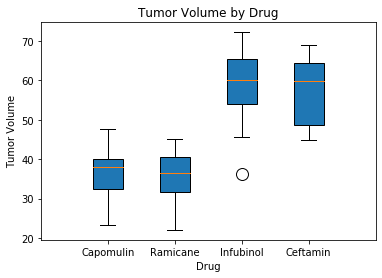

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug')
ax1.set_xlim(0, len(tumor_data)+1)
ax1.set_xlabel('Drug')
ax1.set_ylabel('Tumor Volume')
flierprops = dict(markersize=12,
                  linestyle='none')
ax1.boxplot(tumor_data, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], patch_artist=True,showfliers=True, flierprops=flierprops)

plt.show()

## Line and Scatter Plots

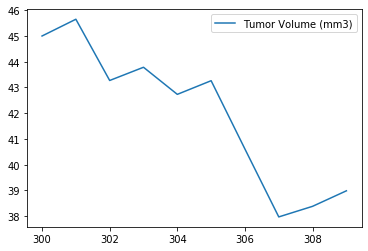

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug1=mice[mice['Drug Regimen']=="Capomulin"]
drug1
tumor = drug1['Tumor Volume (mm3)']


mouse1 = merge_df.groupby('Mouse ID')
mouse1.head()

cap_mouse = merge_df[merge_df['Mouse ID']=='b128']
cap_mouse = cap_mouse[['Mouse ID','Tumor Volume (mm3)']]

cap_mouse.plot(x_compat=True); plt.legend(loc='best')

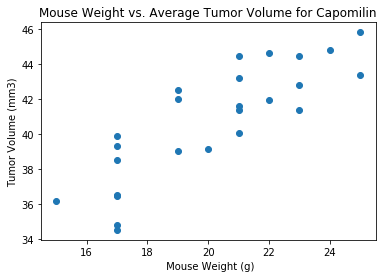

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin"]
avg_cap_df = capomulin_table.groupby(["Mouse ID"]).mean()

x_values = avg_cap_df["Weight (g)"]
y_values = avg_cap_df["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)
plt.xlabel(" Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomilin")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor is 0.84


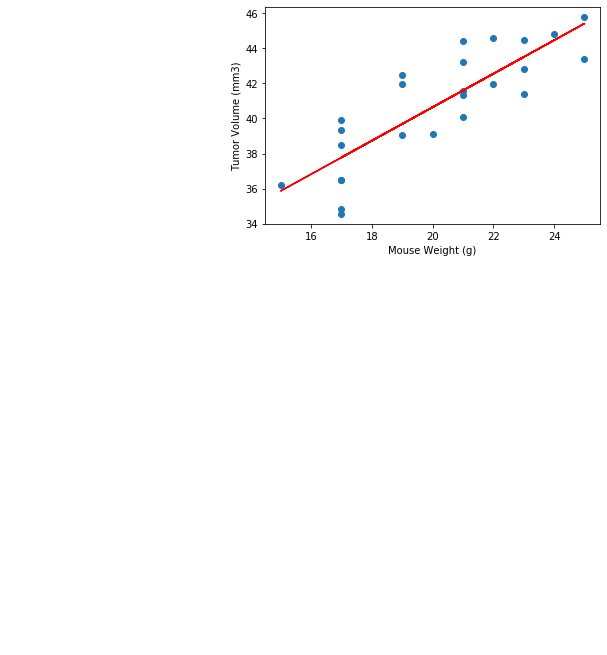

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_cap_df["Weight (g)"],avg_cap_df["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and average tumor is {round(correlation[0],2)}')


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")

plt.ylabel("Tumor Volume (mm3)")
plt.show()